In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df.sample(5)

,Unnamed: 0,label,text,label_num
4508,1391,ham,Subject: re : enron / hpl actuals for august 1...,0
4139,3752,spam,Subject: we deliver to your door within 24 hou...,1
2678,1420,ham,Subject: unify passwords will be reset under s...,0
2534,4703,spam,Subject: immediate contract payment .\r\nimmed...,1
3097,401,ham,Subject: re : 1 / 2000 meter 9643 three rivers...,0


In [5]:
#drop some cols
df.drop(columns=["Unnamed: 0",'label'], inplace=True)

In [6]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

178

In [8]:
df.shape

(5171, 2)

EDA(Exploratory Data Analysis)

In [9]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
df['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x172559b1fd0>,
 [Text(-0.6745093333607546, 0.8689287423081543, 'ham'),
  Text(0.6745094147157317, -0.868928679156029, 'spam')],
 [Text(-0.3679141818331388, 0.4739611321680841, '71.01'),
  Text(0.3679142262085809, -0.4739610977214703, '28.99')])

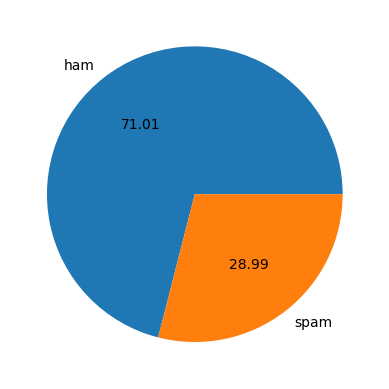

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['label_num'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

data is unbalanced

In [12]:
import nltk

In [13]:
nltk.download('punkt') #unsupervised training model which can be ttrained on data that hasnt been tageed with information identifying its characteristics,properties or categories(unlabeled data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_characters']=df['text'].apply(len) #getting number of characters in every email message and creating a column call num characters 

In [15]:
df.head()

,text,label_num,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [16]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df.head()

,text,label_num,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


Number of Sentences

In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,text,label_num,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [21]:
df[df['label_num'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [22]:
df[df['label_num'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

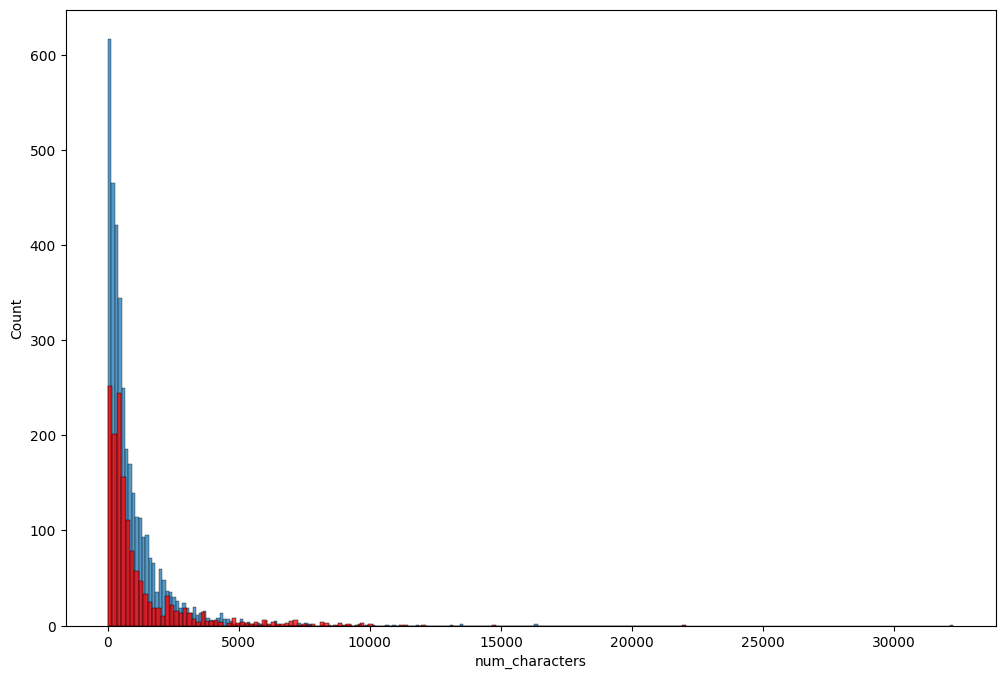

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label_num'] == 0]['num_characters'])
sns.histplot(df[df['label_num'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

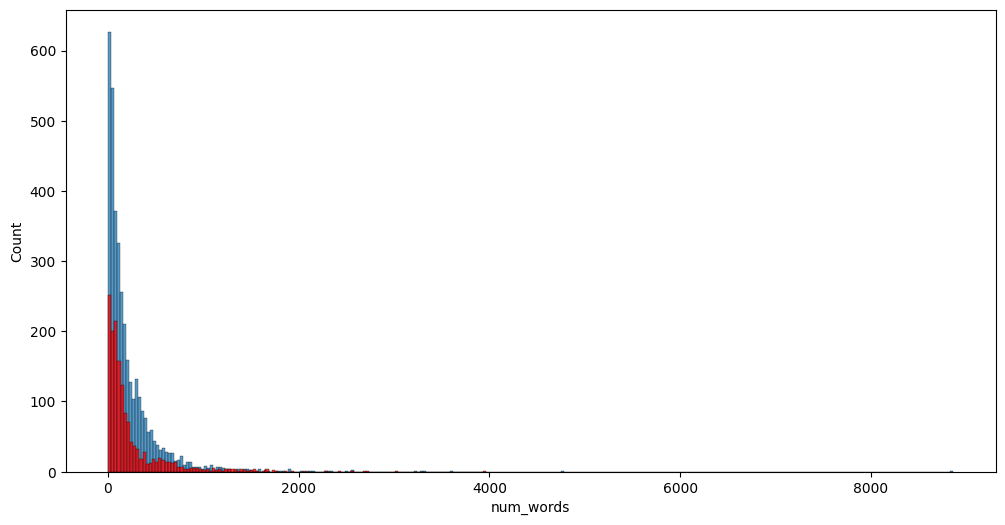

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num'] == 0]['num_words'])
sns.histplot(df[df['label_num'] == 1]['num_words'],color='red')

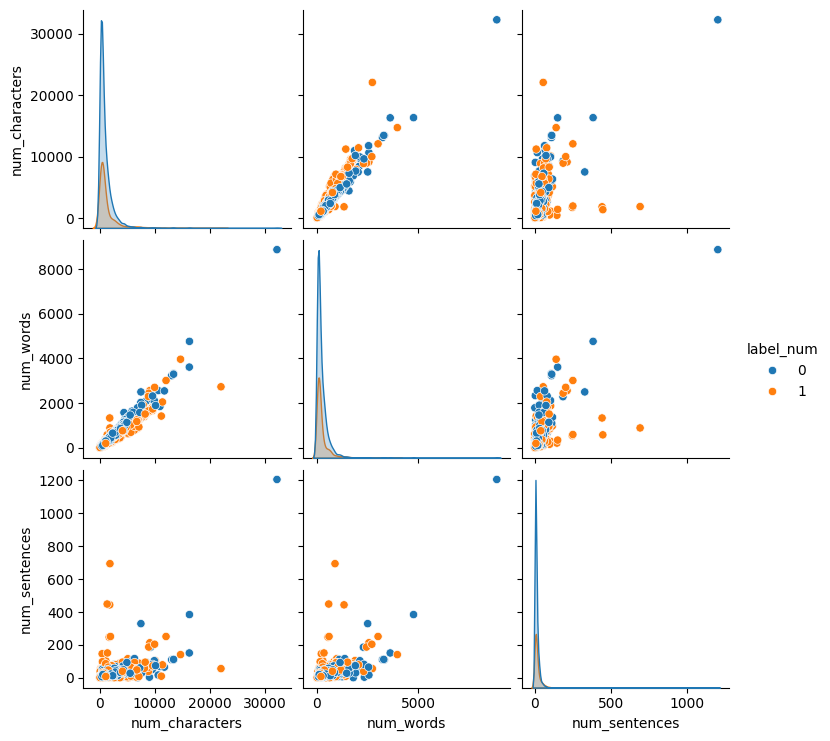

In [26]:
sns.pairplot(df,hue='label_num')

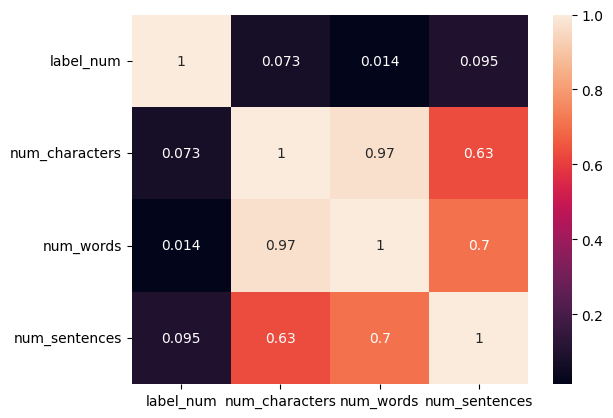

In [27]:
import numpy as np
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr_matrix = numeric_df.corr()
#Plotting the sns(seaborne) heatmap
sns.heatmap(corr_matrix,annot=True)
plt.show()


Data Preprocessing
1. LowerCase
2.Tokenization
3. Removing Special characters
4.Removing stopwords and punctuations
5.Stemming

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string 



In [30]:
#created a method to transform the email text
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
transform_text("Go until jurong point,crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat....")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
spam_wc = wc.generate(df[df['label_num'] == 1]['transformed_text'].str.cat(sep=" "))

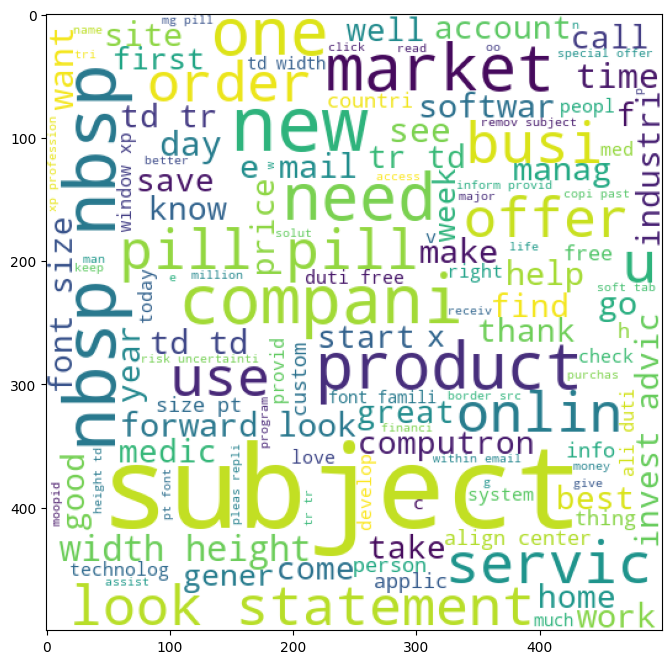

In [36]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['label_num'] == 0]['transformed_text'].str.cat(sep=" "))

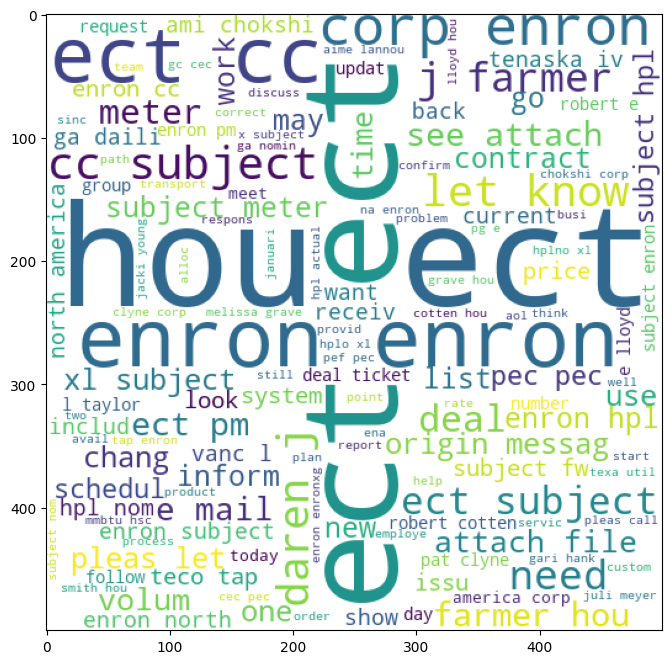

In [38]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)


Purpose: Create an empty list called spam_corpus which will be used to store all the words from spam messages.
Reason: This list will accumulate words from all spam messages for further analysis

Combined Explanation:
Goal: Collect all words from spam messages into a single list.
Process:
Initialize an empty list to store the words.
Filter the DataFrame to include only spam messages and extract their text.
Loop through each spam message, splitting the message into words.
Append each word to the spam_corpus list.
Outcome: After running this code, spam_corpus will contain all the words from the spam messages, enabling further analysis such as frequency counting, word cloud generation, etc.

In [39]:
spam_corpus = []
for msg in df[df['label_num'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [40]:
len(spam_corpus)

197452

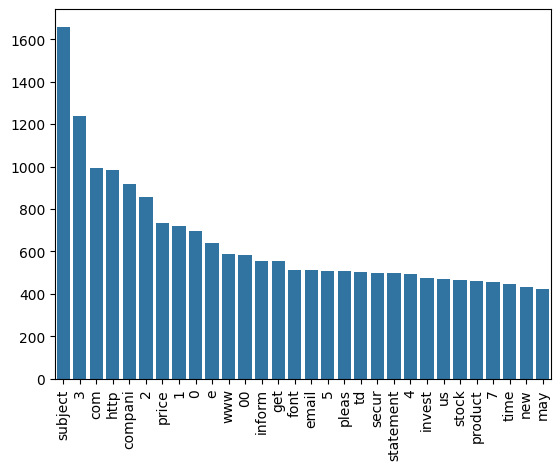

In [41]:
from collections import Counter
sns.barplot(x=[word for word, count in Counter(spam_corpus).most_common(30)], y=[count for word, count in Counter(spam_corpus).most_common(30)])
plt.xticks(rotation='vertical')
plt.show()



In [42]:
ham_corpus = []
for msg in df[df['label_num'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

388650

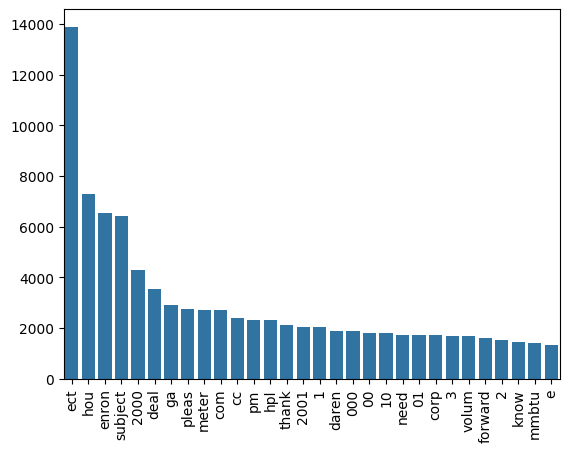

In [44]:
from collections import Counter
sns.barplot(x=[word for word, count in Counter(ham_corpus).most_common(30)], y=[count for word, count in Counter(ham_corpus).most_common(30)])
plt.xticks(rotation='vertical')
plt.show()



In [45]:
#TEXT VECTORIZATION
#USING BAG OF WORDS
df.head()

,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


MODEL BUILDING
A vectorizer in the context of natural language processing (NLP) is a tool that converts text data into numerical format that can be used by machine learning algorithms. 
fit: Learns the vocabulary dictionary of all tokens in the provided text.
transform: Transforms the text data into a numerical matrix based on the learned vocabulary.
the result is a sparse matrix representation of the text data.
toarray(): Converts the sparse matrix to a dense NumPy array.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5171, 3000)

In [49]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [50]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [51]:
X.shape

(5171, 3001)

In [52]:
X

array([[1.24983975e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.27000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.70000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.52400000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.02000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.73000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.11400000e+03]])

In [53]:
y = df['label_num'].values

In [54]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [55]:
from sklearn.model_selection import train_test_split

X_train: The training set of features.
X_test: The testing set of features.
y_train: The training set of labels.
y_test: The testing set of labels.

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Accuracy: Indicates the proportion of correctly classified instances. It’s calculated as:

Accuracy
=
Number of Correct Predictions
Total Number of Predictions
Accuracy= 
Total Number of Predictions
Number of Correct Predictions
​
 
Confusion Matrix: Shows the count of true positives, true negatives, false positives, and false negatives, structured as:

[
True Negatives
False Positives
False Negatives
True Positives
]
[ 
True Negatives
False Negatives
​
  
False Positives
True Positives
​
 ]
Precision: Measures the accuracy of the positive predictions and is calculated as:

Precision
=
True Positives
True Positives
+
False Positives
Precision= 
True Positives+False Positives
True Positives
​


In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.970048309178744
[[731  15]
 [ 16 273]]
0.9479166666666666


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9458937198067633
[[703  43]
 [ 13 276]]
0.8652037617554859


In [61]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9169082125603865
[[690  56]
 [ 30 259]]
0.8222222222222222


tfidf --> MNB

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Each of these classifiers is a machine learning algorithm with its own method for making predictions. Here’s a simple explanation of what each classifier does:

### 1. SVC (Support Vector Classifier)
- **`SVC(kernel='sigmoid', gamma=1.0)`**
- **What It Does**: SVC tries to find the best boundary (hyperplane) that separates different classes of data. The `sigmoid` kernel maps the data into a higher-dimensional space to make it easier to find a separation.
- **Use Case**: Useful for both linear and non-linear classification problems. Often used in text classification and image recognition.

### 2. KNeighborsClassifier
- **`knc = KNeighborsClassifier()`**
- **What It Does**: This classifier looks at the `k` nearest neighbors of a data point and assigns it to the class most common among them.
- **Use Case**: Simple and intuitive method often used for classification and regression tasks, especially when the data is not too large.

### 3. MultinomialNB (Multinomial Naive Bayes)
- **`mnb = MultinomialNB()`**
- **What It Does**: This classifier uses Bayes' theorem and works particularly well with discrete features (e.g., word counts in text classification).
- **Use Case**: Commonly used for text classification problems like spam detection or sentiment analysis.

### 4. DecisionTreeClassifier
- **`dtc = DecisionTreeClassifier()`**
- **What It Does**: It creates a tree-like model of decisions based on the features of the data. Each node represents a decision based on a feature, and each branch represents the outcome of that decision.
- **Use Case**: Useful for both classification and regression tasks, easy to understand and visualize.

### 5. LogisticRegression
- **`lrc = LogisticRegression(solver='liblinear', penalty='l1')`**
- **What It Does**: This classifier models the probability of the default class (usually the binary outcome) using a logistic function. The `l1` penalty adds a regularization term to avoid overfitting.
- **Use Case**: Widely used for binary classification problems such as predicting whether an email is spam or not.

### 6. RandomForestClassifier
- **`rfc = RandomForestClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: This classifier creates a forest of decision trees and merges them to get a more accurate and stable prediction.
- **Use Case**: Effective on a wide range of classification and regression tasks, robust to overfitting.

### 7. AdaBoostClassifier
- **`abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')`**
- **What It Does**: It combines multiple weak classifiers to create a strong classifier by focusing on the errors of the previous classifiers.
- **Use Case**: Good for improving the accuracy of weak models, often used in combination with other classifiers.

### 8. BaggingClassifier
- **`bc = BaggingClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: This classifier builds multiple instances of a specified classifier on random subsets of the data and then averages the results.
- **Use Case**: Useful for reducing variance and improving the stability of the model.

### 9. ExtraTreesClassifier
- **`etc = ExtraTreesClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: Similar to RandomForest, but it uses the whole dataset and random splits to build each tree, which usually leads to more randomness and less overfitting.
- **Use Case**: Effective for classification and regression tasks, offers more randomness compared to RandomForest.

### 10. GradientBoostingClassifier
- **`gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: Builds an ensemble of weak prediction models (usually decision trees) in a stage-wise manner and optimizes the loss function.
- **Use Case**: Often used for classification and regression problems, known for its high predictive performance.

### 11. XGBClassifier (Extreme Gradient Boosting)
- **`xgb = XGBClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: An implementation of gradient boosting designed for speed and performance. It uses an efficient and scalable implementation of gradient boosting algorithms.
- **Use Case**: Widely used in machine learning competitions and practical applications for its high accuracy and speed.

These classifiers offer a variety of approaches for tackling classification problems, each with its own strengths and typical use cases. Depending on the problem at hand, some classifiers may perform better than others, and ensemble methods like the Voting Classifier can leverage the strengths of multiple classifiers.

In [63]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2,algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='macro',zero_division=0)
    
    return accuracy,precision

In [66]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.7207729468599033, 0.36038647342995167)

In [67]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"For {name}")
        print(f"Accuracy - {current_accuracy}")
        print(f"Precision - {current_precision}")
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except Exception as e:
        print(f"Error training {name}: {e}")


For SVC
Accuracy - 0.7207729468599033
Precision - 0.36038647342995167
For KN
Accuracy - 0.7101449275362319
Precision - 0.617246425757064
For NB
Accuracy - 0.9458937198067633
Precision - 0.9235236685872401
For DT
Accuracy - 0.9381642512077295
Precision - 0.9217638887611197
For LR
Accuracy - 0.9710144927536232
Precision - 0.9582318887626468
For RF
Accuracy - 0.9806763285024155
Precision - 0.9741313487208265
For AdaBoost
Accuracy - 0.9198067632850242
Precision - 0.8892548812929779
For BgC
Accuracy - 0.9565217391304348
Precision - 0.9397442104413782
For ETC
Accuracy - 0.9806763285024155
Precision - 0.9723659357805698
For GBDT
Accuracy - 0.9565217391304348
Precision - 0.9424863176490943
For xgb
Accuracy - 0.9739130434782609
Precision - 0.9599113060254738


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [69]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.980676,0.974131
8,ETC,0.980676,0.972366
10,xgb,0.973913,0.959911
4,LR,0.971014,0.958232
9,GBDT,0.956522,0.942486
7,BgC,0.956522,0.939744
2,NB,0.945894,0.923524
3,DT,0.938164,0.921764
6,AdaBoost,0.919807,0.889255
1,KN,0.710145,0.617246


In [70]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [71]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.980676
1,ETC,Accuracy,0.980676
2,xgb,Accuracy,0.973913
3,LR,Accuracy,0.971014
4,GBDT,Accuracy,0.956522
5,BgC,Accuracy,0.956522
6,NB,Accuracy,0.945894
7,DT,Accuracy,0.938164
8,AdaBoost,Accuracy,0.919807
9,KN,Accuracy,0.710145


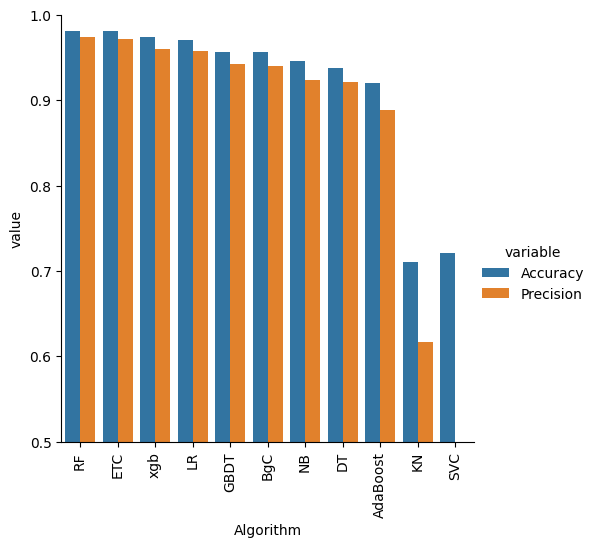

In [72]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data = performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
 #model improve
 #1. Change the max_features parameter of Tfidf

In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [75]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [76]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.980676,0.974131,0.980676,0.974131
1,ETC,0.980676,0.972366,0.980676,0.972366
2,xgb,0.973913,0.959911,0.973913,0.959911
3,LR,0.971014,0.958232,0.971014,0.958232
4,GBDT,0.956522,0.942486,0.956522,0.942486
5,BgC,0.956522,0.939744,0.956522,0.939744
6,NB,0.945894,0.923524,0.945894,0.923524
7,DT,0.938164,0.921764,0.938164,0.921764
8,AdaBoost,0.919807,0.889255,0.919807,0.889255
9,KN,0.710145,0.617246,0.710145,0.617246


In [77]:
new_df_scaled = new_df.merge(pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}))

In [78]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,RF,0.980676,0.974131,0.980676,0.974131,0.980676,0.974131
1,ETC,0.980676,0.972366,0.980676,0.972366,0.980676,0.972366
2,xgb,0.973913,0.959911,0.973913,0.959911,0.973913,0.959911
3,LR,0.971014,0.958232,0.971014,0.958232,0.971014,0.958232
4,GBDT,0.956522,0.942486,0.956522,0.942486,0.956522,0.942486
5,BgC,0.956522,0.939744,0.956522,0.939744,0.956522,0.939744
6,NB,0.945894,0.923524,0.945894,0.923524,0.945894,0.923524
7,DT,0.938164,0.921764,0.938164,0.921764,0.938164,0.921764
8,AdaBoost,0.919807,0.889255,0.919807,0.889255,0.919807,0.889255
9,KN,0.710145,0.617246,0.710145,0.617246,0.710145,0.617246


In [79]:
new_df_scaled1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars', ascending=False)

In [80]:
new_df_scaled = new_df_scaled.merge(new_df_scaled1,on='Algorithm')

In [81]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,RF,0.980676,0.974131,0.980676,0.974131,0.980676,0.974131,0.980676,0.974131
1,ETC,0.980676,0.972366,0.980676,0.972366,0.980676,0.972366,0.980676,0.972366
2,xgb,0.973913,0.959911,0.973913,0.959911,0.973913,0.959911,0.973913,0.959911
3,LR,0.971014,0.958232,0.971014,0.958232,0.971014,0.958232,0.971014,0.958232
4,GBDT,0.956522,0.942486,0.956522,0.942486,0.956522,0.942486,0.956522,0.942486
5,BgC,0.956522,0.939744,0.956522,0.939744,0.956522,0.939744,0.956522,0.939744
6,NB,0.945894,0.923524,0.945894,0.923524,0.945894,0.923524,0.945894,0.923524
7,DT,0.938164,0.921764,0.938164,0.921764,0.938164,0.921764,0.938164,0.921764
8,AdaBoost,0.919807,0.889255,0.919807,0.889255,0.919807,0.889255,0.919807,0.889255
9,KN,0.710145,0.617246,0.710145,0.617246,0.710145,0.617246,0.710145,0.617246


modules used so far; panda ,scikit
A Voting Classifier is a type of machine learning model that combines the predictions of multiple different models to make a final prediction. Think of it like a group of experts who each give their opinion on a decision, and the final decision is made based on what most experts agree on. Here's a simple breakdown:
How It Works
Multiple Models:

Imagine you have three different models (experts) that are each good at making predictions in different ways.
For example, one model might be good at recognizing certain patterns, another at handling numbers, and a third at understanding relationships.
Making Predictions:

Each model looks at the same data and makes its own prediction.
For instance, if the task is to predict whether an email is spam or not, each model will say "spam" or "not spam."
Combining Predictions:

The Voting Classifier takes the predictions from all the models and combines them.
There are two main ways to combine the predictions:
Hard Voting: This is like majority voting. The final prediction is the one that the most models agree on. If two out of three models say "spam," then the final prediction is "spam."
Soft Voting: This considers how confident each model is in its prediction. The final prediction is based on the average of these confidence scores. This is often more accurate because it takes into account not just the vote, but how sure each model is about its vote.
Why Use a Voting Classifier?
Improved Accuracy: By combining the strengths of different models, a Voting Classifier often makes more accurate predictions than any single model on its own.
Reduced Risk of Errors: If one model makes a mistake, the other models can correct it. This reduces the chance of the final prediction being wrong.
Robustness: It balances out the weaknesses of individual models, leading to a more reliable overall prediction.


In [126]:
#Voting Classifier
#svc = SVC(kernel='sigmoid' , gamma=1.0,probability=True)
xgb = XGBClassifier(n_estimators=50,random_state=2)
mnb = MultinomialNB()
#rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [128]:
voting = VotingClassifier(estimators=[('xgb',xgb), ('nb',mnb),('et',etc)],voting='soft')

In [129]:
voting.fit(X_train,y_train) 

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...ne,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [130]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845410628019323
Precision 0.9534883720930233


A Stacking Classifier is another type of ensemble method in machine learning that combines multiple models to improve predictive performance. Think of it like consulting multiple experts (base models) and then having a super expert (meta-model) who makes the final decision based on the input from these experts. Here’s a simple explanation of how it works:

How Stacking Classifier Works
Base Models (Level-0 models):
These are the initial models that make predictions on the data.
For example, you might have a Decision Tree, a Random Forest, and a Support Vector Machine as your base models.
Meta-Model (Level-1 model):
This is the model that takes the predictions from the base models as input and makes the final prediction.
Common choices for the meta-model are simple models like Logistic Regression or more complex ones like Gradient Boosting.

In [145]:
#Applying Stacking
estimators=[('svc', svc), ('nb',mnb), ('et',etc)]
final_estimator=RandomForestClassifier()

In [146]:
from sklearn.ensemble import StackingClassifier

In [147]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [148]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845410628019323
Precision 0.9595959595959596


In [149]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))